In [1]:
from algorithms.sampling import *
from matplotlib.lines import Line2D
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 15})


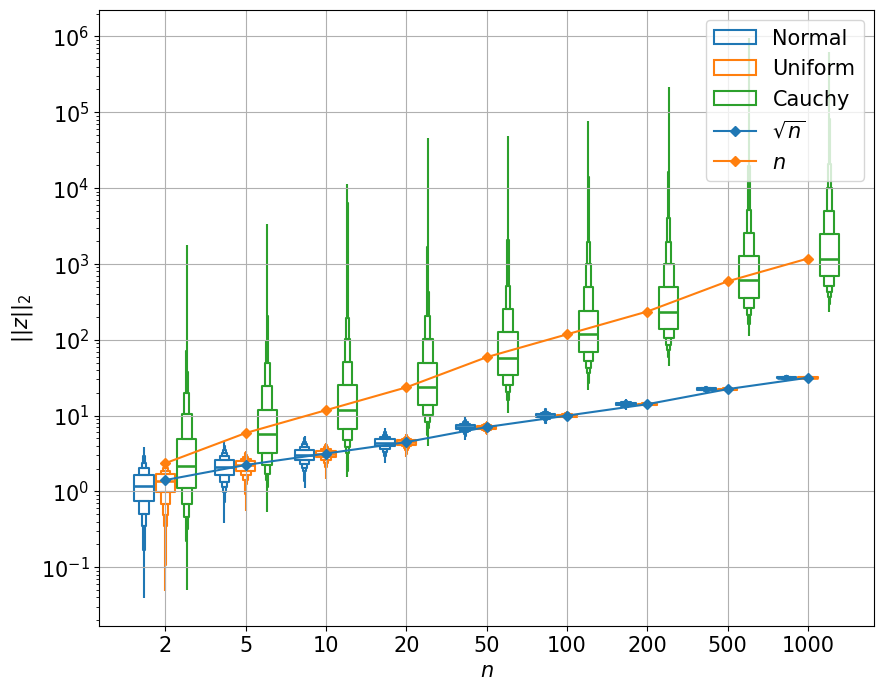

In [2]:
n_samples = 10000

records = []
for i, (sampler) in enumerate((Normal(), Uniform(), Cauchy())):
    for d in (2, 5, 10, 20, 50, 100, 200, 500, 1000):
        samples = [(sampler.__class__.__name__, d, np.linalg.norm(sampler(d))) for _ in range(n_samples)]
        records.extend(samples)

colums = ["Sampler", r"$n$", r"$||z||_2$"]
data = pd.DataFrame(records, columns = colums)
plt.figure(figsize=(10, 8))
sns.boxenplot(data, x=colums[1], hue=colums[0], y=colums[2], fill=False, gap=.1, showfliers=False)

dims = np.array((2, 5, 10, 20, 50, 100, 200, 500, 1000))
plt.plot(range(len(dims)), np.sqrt(dims), marker='D', markersize=5, label=r'$\sqrt{n}$')
plt.plot(range(len(dims)), 1.18 * dims, marker='D', markersize=5, label=r'${n}$')
plt.yscale("log")
plt.legend()
plt.grid()

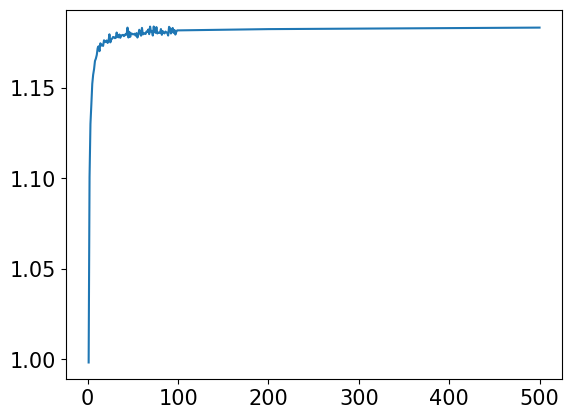

In [34]:
# Monte Carlo simulation to estimate the median of the 2-norm for n=2
ratios = []
dims = list(range(1, 100)) + [200, 500]
for n_dim in dims:
    n_samples = 10**6  # Number of samples

    # Generate samples from the standard Cauchy distribution for n=2
    samples = np.random.standard_cauchy(size=(n_samples, n_dim))
    norms = np.linalg.norm(samples, axis=1)
    
    # Compute the median
    median_norm = np.median(norms)
    ratio = median_norm/n_dim
    ratios.append(ratio)

plt.plot(dims, ratios)

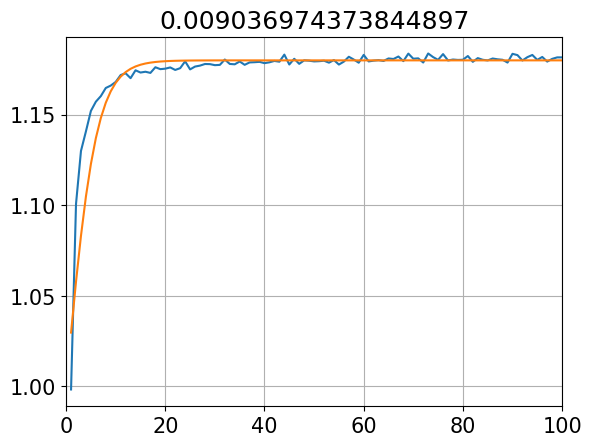

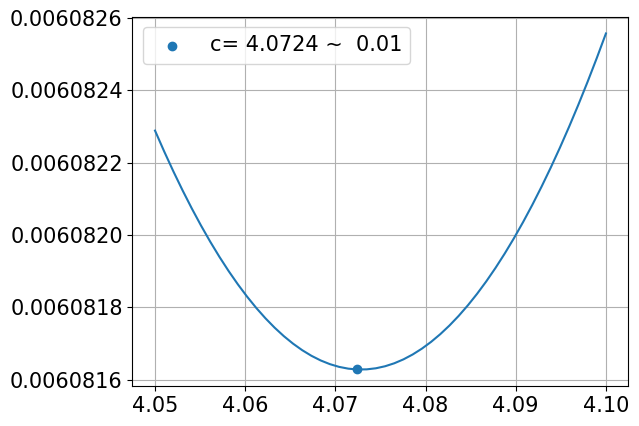

In [131]:
dims = np.asarray(dims)
plt.plot(dims, ratios)
c = 6
y = 1 + 0.18 * np.tanh(dims / c)
rmse = np.sqrt(np.mean(pow(y - ratios, 2)))
plt.plot(dims, y)
plt.title(rmse)
plt.xlim(0, 100)
plt.grid()

cs, rmses = [], []
for c in np.linspace(4.05, 4.1):
    y = 1 + 0.18 * np.tanh(dims / c)
    rmse = np.sqrt(np.mean(pow(y - ratios, 2)))
    cs.append(c)
    rmses.append(rmse)

plt.figure()
plt.plot(cs, rmses)
idx = np.argmin(rmses)
plt.scatter(cs[idx], rmses[idx], label=f"c={cs[idx]: .4f} ~ {rmses[idx]: .2f}")
plt.legend()
plt.grid()

In [84]:
np.array(dims) / 10

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       20. , 50. ])

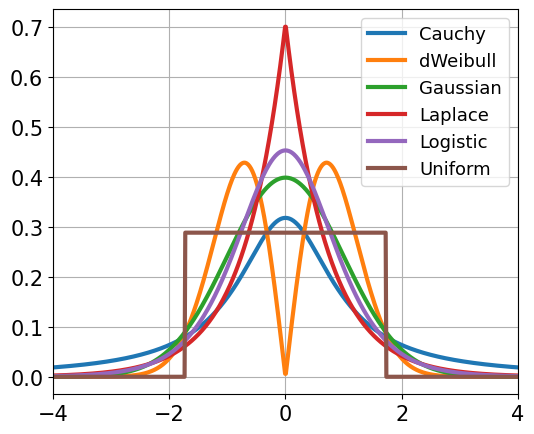

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import math
from scipy.stats import norm, uniform, laplace, logistic, cosine, dweibull, cauchy, weibull_min

plt.figure(figsize=(6,5))
lw = 3
x = np.linspace(-6, 6, 1000)
plt.plot(x, cauchy.pdf(x), label='Cauchy', linewidth=lw)
plt.plot(x, dweibull.pdf(x, 2.0, scale=1), label='dWeibull', linewidth=lw)
plt.plot(x, norm.pdf(x), label='Gaussian', linewidth=lw)
plt.plot(x, laplace.pdf(x, scale=np.sqrt(1/2)), label='Laplace', linewidth=lw)
plt.plot(x, logistic.pdf(x, scale=np.sqrt(3) / np.pi), label='Logistic', linewidth=lw)
plt.plot(x, uniform(-np.sqrt(3), 2*np.sqrt(3)).pdf(x), label='Uniform', linewidth=lw)
# plt.plot(x, weibull_min.pdf(x, 2.0, scale=1), label='dWeibull', linewidth=2)


# plt.axvline(x=1 * math.gamma(1 + 1 / 2))
# plt.axvline(x=pow(np.log(2), 1/2.0))
# plt.axvline(x=pow((k - 1) / k, 1/k))

plt.grid()
plt.xlim(-4, 4)
plt.legend(fontsize=13)
plt.savefig("distributions.pdf")


1.0000059968575545

In [4]:
data = pd.read_csv("../data/OnePlusOneES(budget=10000, sigma0=None, sampler=Laplace, archive=None, c=0.817)/data_f1_Sphere/IOHprofiler_f1_DIM2.dat", sep=' ')

data.evaluations == '1'

0        True
1       False
2       False
3       False
4       False
        ...  
1225    False
1226    False
1227    False
1228    False
1229    False
Name: evaluations, Length: 1230, dtype: bool

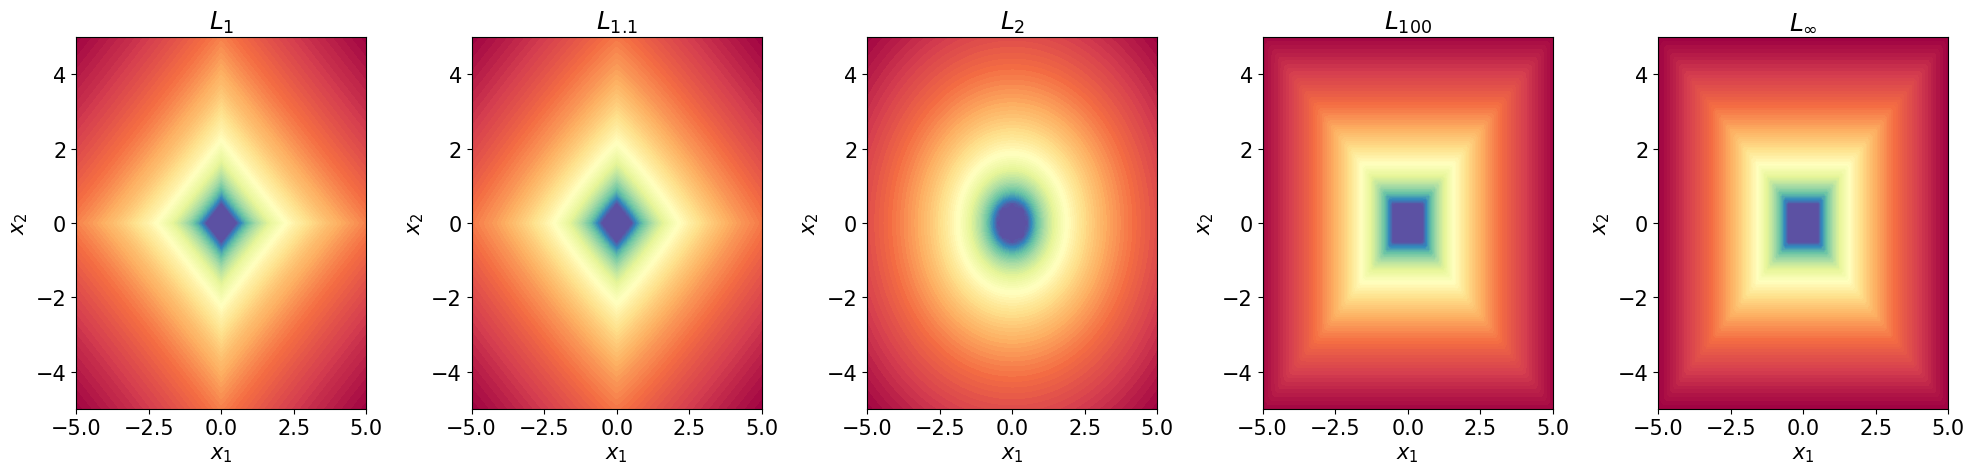

In [254]:
def inf_norm(x):
    return np.linalg.norm(x, np.inf)

def one_norm(x):
    return np.linalg.norm(x, 1)

import ioh
from algorithms.utils import get_meshgrid, plot_contour


def plot_contour(X, Y, Z, colorbar=True):
    plt.contourf(
        X, Y, -np.log10(Z.clip(0.5)), levels=100, cmap="Spectral", zorder=-1, #vmin=-1.5, vmax=1.5
    )
    plt.xlabel(R"$x_1$")
    plt.ylabel(R"$x_2$")
    if colorbar:
        plt.colorbar()
    plt.tight_layout()
    

l_inf = ioh.wrap_problem(
    inf_norm, 
    r"$L_\infty$", 
    dimension=2, 
    calculate_objective=lambda iid, dim: ([0] * dim, 0.0),
)

l_one = ioh.wrap_problem(
    one_norm, 
    r"$L_1$", 
    dimension=2, 
    calculate_objective=lambda iid, dim: ([0] * dim, 0.0),
)

l_11 = ioh.wrap_problem(
    lambda x: np.linalg.norm(x, 1.1), 
    r"$L_{1.1}$", 
    dimension=2, 
    calculate_objective=lambda iid, dim: ([0] * dim, 0.0),
)

l_two = ioh.wrap_problem(
    lambda x: np.linalg.norm(x, 2), 
    r"$L_2$", 
    dimension=2, 
    calculate_objective=lambda iid, dim: ([0] * dim, 0.0),
)


l_two = ioh.wrap_problem(
    lambda x: np.linalg.norm(x, 2), 
    r"$L_2$", 
    dimension=2, 
    calculate_objective=lambda iid, dim: ([0] * dim, 0.0),
)

l_ten = ioh.wrap_problem(
    lambda x: np.linalg.norm(x, 100), 
    r"$L_{100}$", 
    dimension=2, 
    calculate_objective=lambda iid, dim: ([0] * dim, 0.0),
)



    
f, axes = plt.subplots(1, 5, figsize=(20, 5))
for ax, p in zip(axes, (l_one,l_11, l_two, l_ten,  l_inf)):
    plt.sca(ax)
    ax.set_title(p.meta_data.name)
    X, Y, Z = get_meshgrid(p, -5, 5, delta=.1)
    plot_contour(X, Y, Z, colorbar=0)

plt.tight_layout()

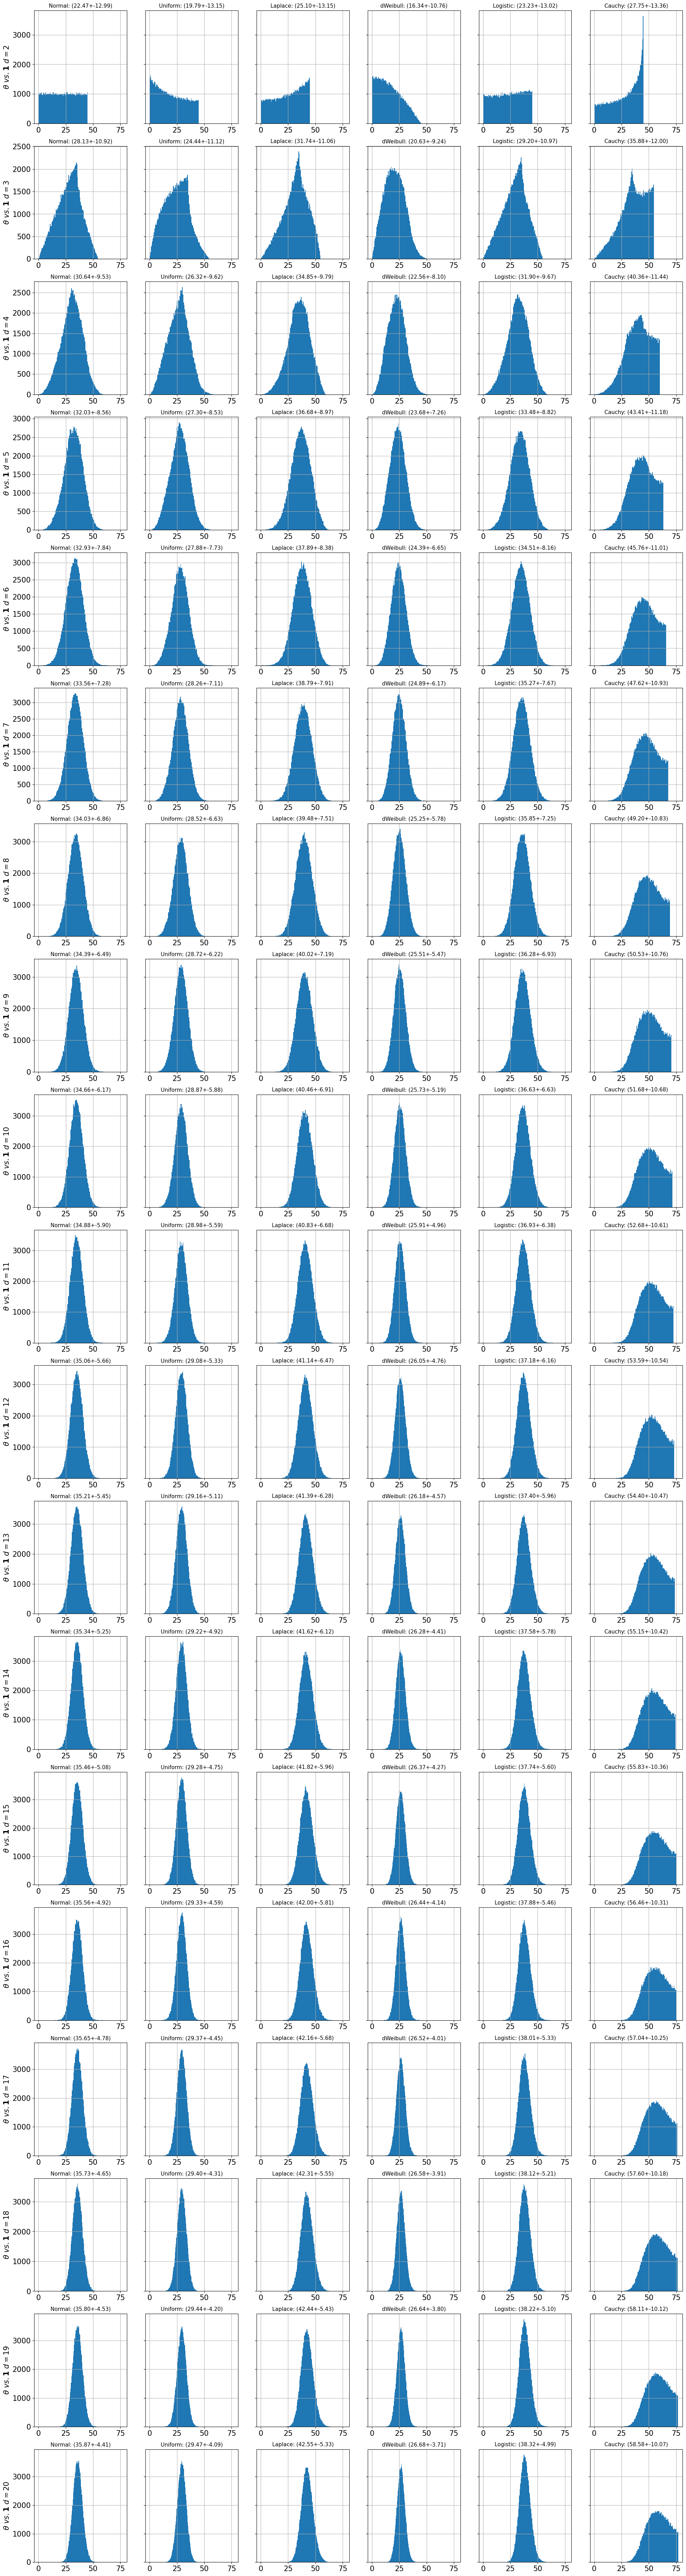

In [195]:
n_samples = 100000
n = 20
samplers = Normal(), Uniform(), Laplace(), dWeibull(), Logistic(), Cauchy()
f, axes = plt.subplots((n-1), len(samplers), figsize=(4*len(samplers), 5 * (n - 1)), sharex=True, sharey='row')
for i, ((ax1, *axs), sampler) in enumerate(zip(axes.T, samplers)):
    samples = np.abs(sampler.sample_k(n_samples, n))
    directions = samples / np.linalg.norm(samples, axis=0)

    # subset = directions[:, np.all(directions > 0, axis=0)]
    
    # angles = np.degrees(np.arctan2(abs(directions[1]), abs(directions[0])))
    # hist = ax1.hist(angles, bins=100)

    # ax1.grid()
    # if i ==0:
    #     ax1.set_ylabel(r"$\theta\ \frac{x_2}{x_1}$")
    
    for d, ax in enumerate(np.r_[ax1, axs], 2):
        angles2 = np.array([angle_with_all_ones(s[:d]) for s in directions.T])
        ax.set_title(f"{sampler.__class__.__name__}: ({np.mean(angles2):.2f}+-{np.std(angles2):.2f})", fontsize=11)
        ax.hist(angles2, bins=100)
        ax.grid()
        ax.xaxis.set_tick_params(which='both', labelbottom=True)
        if i == 0:
            ax.set_ylabel(r"$\theta\ vs. \mathbf{1}\ d=$" + str(d))

plt.savefig("angles_vs_unitvec_abs.pdf")
    

In [166]:
def angle_with_all_ones(vector):
    # Convert input to a numpy array
    vector = np.array(vector)
    all_ones = np.ones_like(vector)
    dot_product = np.dot(vector, all_ones)

    # Compute the magnitudes
    magnitude_v = np.linalg.norm(vector)
    magnitude_ones = np.linalg.norm(all_ones)

    # Compute the cosine of the angle
    cos_theta = dot_product / (magnitude_v * magnitude_ones)

    # Ensure the value is within the valid domain for arccos [-1, 1] (handle numerical precision issues)
    cos_theta = np.clip(cos_theta, -1.0, 1.0)

    # Compute the angle in radians and convert to degrees
    angle_radians = np.arccos(cos_theta)
    angle_degrees = np.degrees(angle_radians)

    return angle_degrees

# Example usage

# angle = angle_with_all_ones(vector)


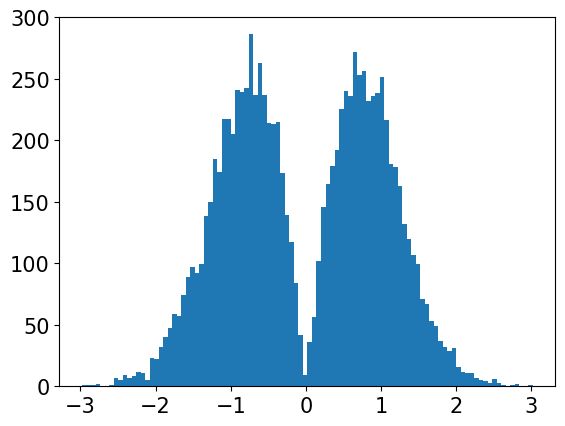

In [167]:
def uniform_to_double_weibull(uniform_samples, beta=2.0, lambd=1):
    mask = uniform_samples < 0.5
    values = np.empty_like(uniform_samples)
    values[mask] = -lambd * (-np.log(2 * uniform_samples[mask]))**(1 / beta)
    values[~mask] = lambd * (-np.log(2 * (1 - uniform_samples[~mask])))**(1 / beta)
    return values
    

u = np.random.uniform(size=(10000))
w = uniform_to_double_weibull(u)
plt.hist(w, bins=100);

Text(0.5, 0, 'dimension')

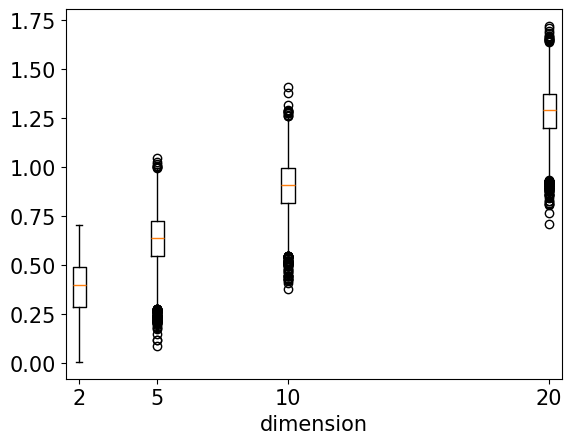

In [ ]:

norm_z = []
ns = (2, 5, 10, 20)
for n in ns:
    u = np.random.uniform(size=(n, 10000))
    norm_z.append(np.linalg.norm(u - np.ones((n,1)) *.5, axis=0))

plt.boxplot(norm_z, positions=ns);
plt.xlabel("dimension")
    